# **Data Science Buildables Fellowship**

### **Evaluating Logistic Regression with Cross-Validation**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importing models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

#Importing preprocessing and evaluation tools
from sklearn.preprocessing import LabelEncoder

#importing model selection tools
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve, 
    auc
)

In [6]:
#Load the dataset:
df = pd.read_csv('Titanic-Dataset.csv')

In [8]:
# Preprocessing (basic for demonstration)
# Drop rows with missing 'Embarked' for simplicity, fill 'Age' and 'Fare'
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

/tmp/ipykernel_37972/2062298278.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipykernel_37972/2062298278.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [9]:
# Convert categorical features to numerical
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [10]:
# Drop non-contributing features for this analysis
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

X = df.drop('Survived', axis=1)
y = df['Survived']


In [11]:
# Single train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_single_split = log_reg.predict(X_test)
single_split_accuracy = accuracy_score(y_test, y_pred_single_split)

In [13]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X, y, cv=kf)

In [14]:
print(f"Single train-test split accuracy: {single_split_accuracy:.4f}")
print(f"Average cross-validation accuracy: {cv_scores.mean():.4f}")
print(f"Cross-validation scores: {cv_scores}")

Single train-test split accuracy: 0.7809
Average cross-validation accuracy: 0.7930
Cross-validation scores: [0.78089888 0.80337079 0.81460674 0.81460674 0.75141243]


### **Analyzing Overfitting and Underfitting in Decision Trees**

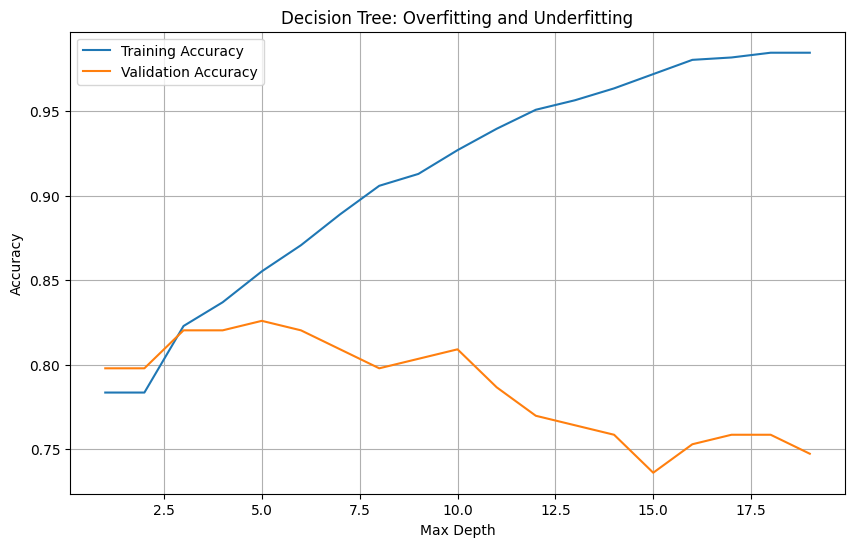

In [15]:
# Decision Tree for overfitting/underfitting
train_accuracies = []
val_accuracies = []
depths = range(1, 20)

for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    
    train_accuracies.append(accuracy_score(y_train, dt_classifier.predict(X_train)))
    val_accuracies.append(accuracy_score(y_test, dt_classifier.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, val_accuracies, label='Validation Accuracy')
plt.title('Decision Tree: Overfitting and Underfitting')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### **Calculating Precision, Recall, and F1-Score for Logistic Regression**

In [16]:
# Logistic Regression with detailed metrics
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression Metrics:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")

Logistic Regression Metrics:
  Accuracy: 0.7809
  Precision: 0.6923
  Recall: 0.7826
  F1-Score: 0.7347


### **ROC Curve and AUC Analysis for Decision Trees**

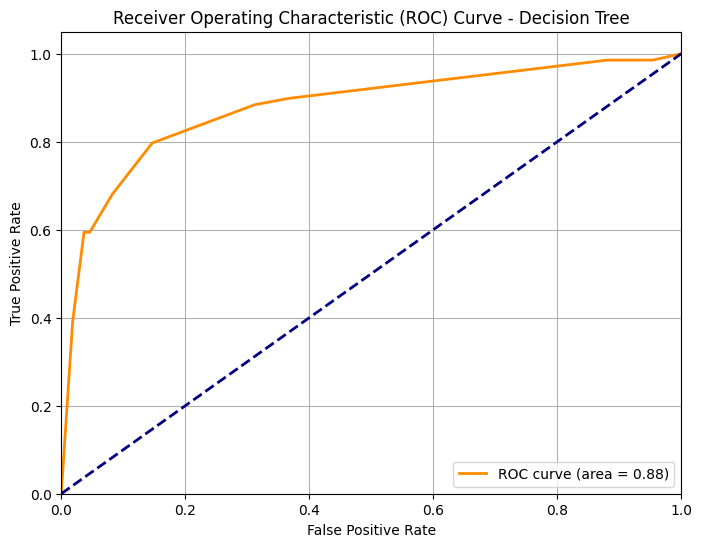

Decision Tree AUC: 0.8787


In [17]:
# Decision Tree ROC Curve and AUC
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42) # Using an optimal depth
dt_classifier.fit(X_train, y_train)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Decision Tree AUC: {roc_auc:.4f}")

### **Comparing Model Performance with and without Cross-Validation**

In [18]:
# Models
log_reg = LogisticRegression(max_iter=200, random_state=42)
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

models = {'Logistic Regression': log_reg, 'Decision Tree': dt_classifier}

results_single = {}
results_cv = {}

for name, model in models.items():
    # Single train-test split
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results_single[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }
    
    # Cross-validation
    cv_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy').mean()
    cv_precision = cross_val_score(model, X, y, cv=kf, scoring='precision').mean()
    cv_recall = cross_val_score(model, X, y, cv=kf, scoring='recall').mean()
    
    results_cv[name] = {
        'Accuracy': cv_accuracy,
        'Precision': cv_precision,
        'Recall': cv_recall
    }

print("--- Single Train-Test Split Performance ---")
for name, metrics in results_single.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

print("\n--- Cross-Validation Performance ---")
for name, metrics in results_cv.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

--- Single Train-Test Split Performance ---
Logistic Regression:
  Accuracy: 0.7809
  Precision: 0.6923
  Recall: 0.7826
Decision Tree:
  Accuracy: 0.8258
  Precision: 0.8393
  Recall: 0.6812

--- Cross-Validation Performance ---
Logistic Regression:
  Accuracy: 0.7930
  Precision: 0.7456
  Recall: 0.7019
Decision Tree:
  Accuracy: 0.8088
  Precision: 0.8329
  Recall: 0.6338


### **Applying Cross-Validation to Random Forest Classifier**

In [19]:
# Random Forest with Cross-Validation
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=kf)
print(f"Random Forest Average Cross-Validation Accuracy: {rf_cv_scores.mean():.4f}")
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")

# Train and evaluate for single split to show comparison, although goal is CV
rf_classifier.fit(X_train, y_train)
y_pred_rf_single = rf_classifier.predict(X_test)
print(f"Random Forest Single Split Accuracy: {accuracy_score(y_test, y_pred_rf_single):.4f}")

Random Forest Average Cross-Validation Accuracy: 0.8043
Random Forest Cross-Validation Scores: [0.74719101 0.79775281 0.84831461 0.83146067 0.79661017]
Random Forest Single Split Accuracy: 0.7697


### **Investigating Overfitting and Underfitting in Gradient Boosting Machines**

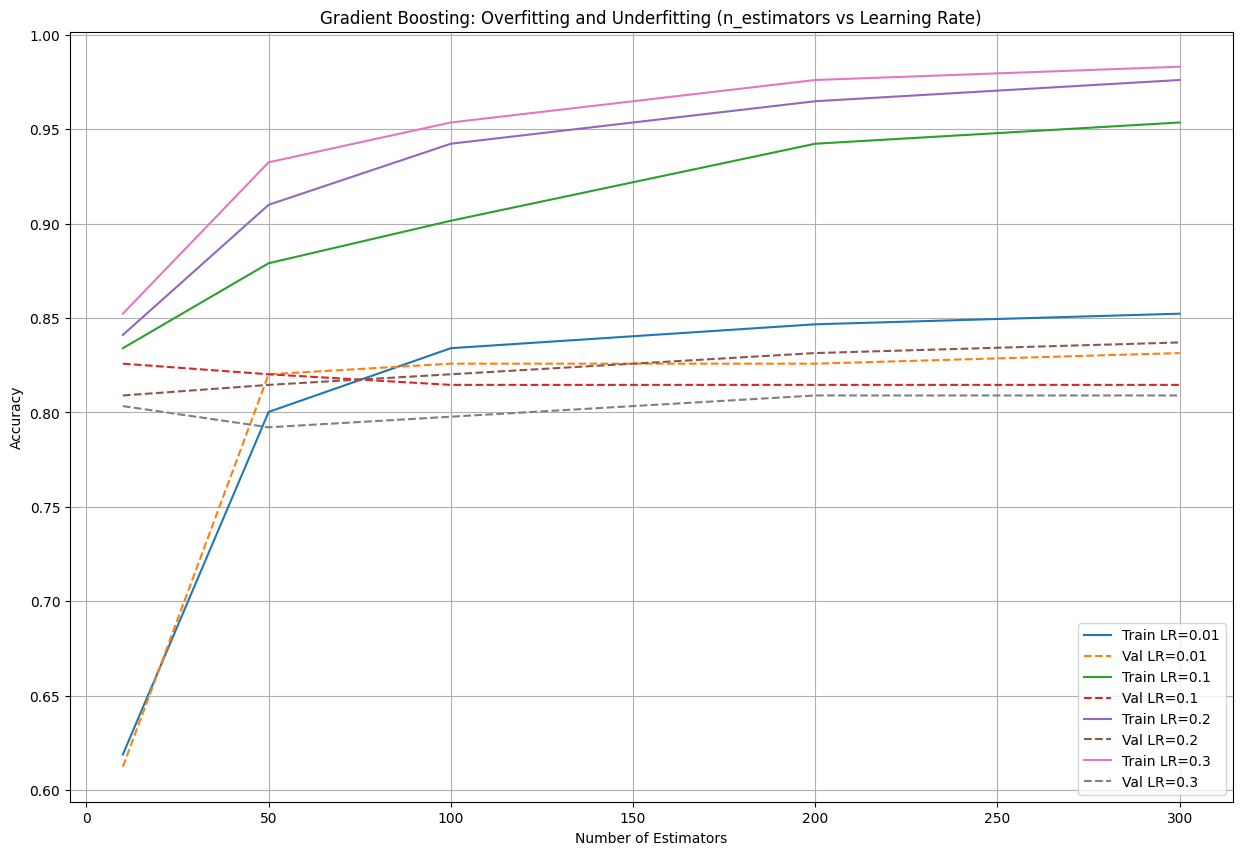

In [20]:
# Gradient Boosting for overfitting/underfitting
n_estimators_range = [10, 50, 100, 200, 300]
learning_rates = [0.01, 0.1, 0.2, 0.3]

plt.figure(figsize=(15, 10))

for lr in learning_rates:
    train_accuracies_gb = []
    val_accuracies_gb = []
    for n_est in n_estimators_range:
        gb_classifier = GradientBoostingClassifier(n_estimators=n_est, learning_rate=lr, random_state=42)
        gb_classifier.fit(X_train, y_train)
        train_accuracies_gb.append(accuracy_score(y_train, gb_classifier.predict(X_train)))
        val_accuracies_gb.append(accuracy_score(y_test, gb_classifier.predict(X_test)))
    
    plt.plot(n_estimators_range, train_accuracies_gb, label=f'Train LR={lr}')
    plt.plot(n_estimators_range, val_accuracies_gb, linestyle='--', label=f'Val LR={lr}')

plt.title('Gradient Boosting: Overfitting and Underfitting (n_estimators vs Learning Rate)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### **Evaluating Precision, Recall, and F1-Score for Random Forests**

In [21]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Metrics:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1-Score: {f1_rf:.4f}")

Random Forest Metrics:
  Accuracy: 0.7697
  Precision: 0.6842
  Recall: 0.7536
  F1-Score: 0.7172


### **ROC Curve and AUC for Gradient Boosting Classifier**

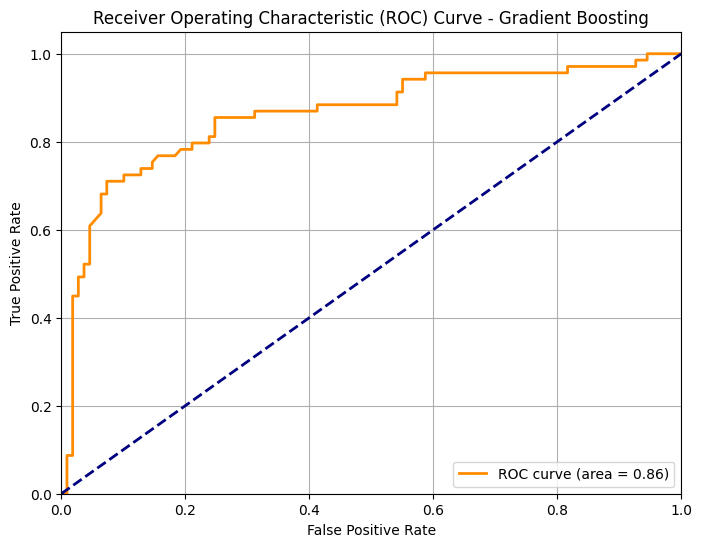

Gradient Boosting AUC: 0.8625


In [22]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_proba_gb = gb_classifier.predict_proba(X_test)[:, 1]

fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Gradient Boosting AUC: {roc_auc_gb:.4f}")

### **Model Performance Comparison with Different Metrics**

Evaluating SVM...
Evaluating Random Forest...
Evaluating Gradient Boosting...



--- Model Performance Comparison (Cross-Validation) ---

SVM:
  Accuracy: 0.6760
  Precision: 0.6791
  Recall: 0.2953
  F1-Score: 0.4099
  ROC-AUC: 0.7319

Random Forest:
  Accuracy: 0.8043
  Precision: 0.7615
  Recall: 0.7229
  F1-Score: 0.7389
  ROC-AUC: 0.8610

Gradient Boosting:
  Accuracy: 0.8234
  Precision: 0.8262
  Recall: 0.6883
  F1-Score: 0.7481
  ROC-AUC: 0.8711

--- Summary DataFrame ---
                   Accuracy  Precision  Recall  F1-Score  ROC-AUC
SVM                  0.6760     0.6791  0.2953    0.4099   0.7319
Random Forest        0.8043     0.7615  0.7229    0.7389   0.8610
Gradient Boosting    0.8234     0.8262  0.6883    0.7481   0.8711


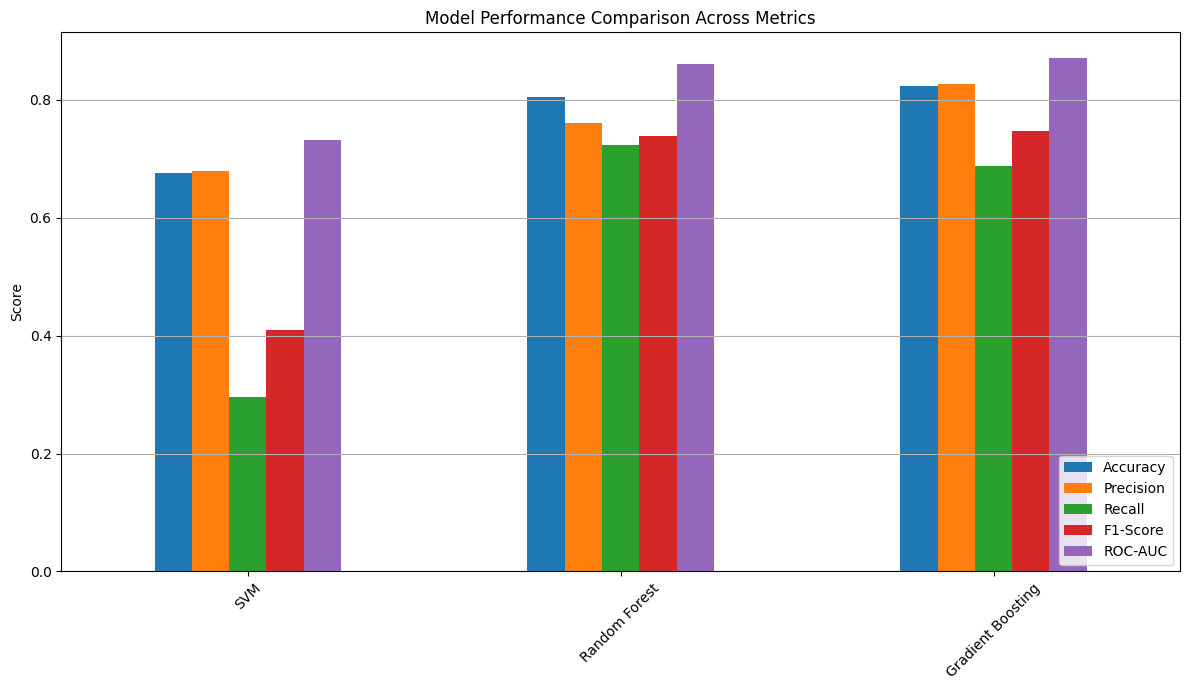

In [23]:
# Models to compare
svm_classifier = SVC(probability=True, random_state=42) # probability=True for ROC-AUC
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

models = {
    'SVM': svm_classifier,
    'Random Forest': rf_classifier,
    'Gradient Boosting': gb_classifier
}

results_comparison = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Define kf if not already defined

for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Cross-validation for various metrics
    cv_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy').mean()
    cv_precision = cross_val_score(model, X, y, cv=kf, scoring='precision').mean()
    cv_recall = cross_val_score(model, X, y, cv=kf, scoring='recall').mean()
    cv_f1 = cross_val_score(model, X, y, cv=kf, scoring='f1').mean()
    
    # For ROC-AUC, we need predict_proba, which is not directly available in cross_val_score for all models.
    # We'll do a manual loop for ROC-AUC calculation to ensure it's handled correctly for each fold.
    # Note: This is a more involved way to get CV AUC for each model robustly.
    
    # Initialize list to store AUC for each fold
    auc_scores = []
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train_fold, y_train_fold)
        
        # Check if the model has predict_proba
        if hasattr(model, "predict_proba"):
            y_pred_proba_fold = model.predict_proba(X_val_fold)[:, 1]
            fpr_fold, tpr_fold, _ = roc_curve(y_val_fold, y_pred_proba_fold)
            auc_scores.append(auc(fpr_fold, tpr_fold))
        else:
            # Handle models without predict_proba (like some SVM configurations)
            auc_scores.append(np.nan) # Append NaN if not available

    cv_auc = np.mean(auc_scores) if auc_scores else np.nan

    results_comparison[name] = {
        'Accuracy': cv_accuracy,
        'Precision': cv_precision,
        'Recall': cv_recall,
        'F1-Score': cv_f1,
        'ROC-AUC': cv_auc
    }

# Display results
print("\n--- Model Performance Comparison (Cross-Validation) ---")
for name, metrics in results_comparison.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

# Convert results to a DataFrame for easier comparison and potentially plotting
results_df = pd.DataFrame(results_comparison).T
print("\n--- Summary DataFrame ---")
print(results_df.round(4))

# Optional: Visualize comparison
results_df.plot(kind='bar', figsize=(12, 7))
plt.title('Model Performance Comparison Across Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()